In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
# generate the data using make_blods(), a convience function in sckit-lean to generate
#synthetic cluster
features, true_labels = make_blobs(n_samples = 200, centers= 3, cluster_std=2.75, random_state=42)

In [3]:
# printing five elements for each of the variable returned.
print(features[:5])
print(true_labels[:5])

# This data has 200 samples and 2 features
print(features.shape)

[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
[1 0 2 2 2]
(200, 2)


In [4]:
#The values for all features must be transformed to the same scale,
#the process of transforming numricla features to use the same scale
# is knownas features scaling or normalization.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features[:5])

[[ 2.13082109  0.25604351]
 [-1.52698523  1.41036744]
 [-1.00130152 -1.56583175]
 [-1.74256891 -1.76832509]
 [-1.29924521 -0.87253446]]


In [5]:
# Initiate the Kmeans class
Kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter= 300, random_state=42)

In [6]:
# the next step is to fit the model with the scaled data.
Kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [7]:
# Statistic from the initializton run with the lowest SSE are avilable
# as atribute pf kmeans after calling function inertia_

Kmeans.inertia_

52.27538725902107

In [8]:
# The clusters assigments are stores a one-dimentional Numpy array
print(Kmeans.labels_[:5])
print(true_labels[:5])

[1 3 2 0 0]
[1 0 2 2 2]


In [12]:
# Running the model using different configuration
kmean_kwarg = {"init":"random","n_init":10,"max_iter":1000,"random_state":42}

#create empty list to old the SSE for each k
number_of_cluster = 9
sse = []
for k in range(1,number_of_cluster):
    Kmeans = KMeans(n_clusters = k, **kmean_kwarg)
    Kmeans.fit(scaled_features)
    sse.append(Kmeans.inertia_)

Text(0, 0.5, 'SSE')

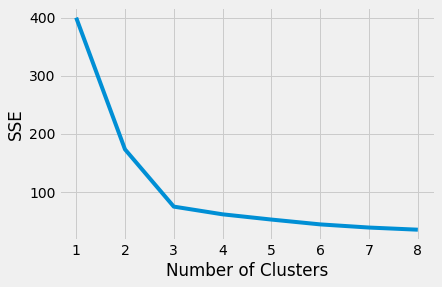

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,number_of_cluster),sse)
plt.xticks(range(1,number_of_cluster))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")


In [15]:
print(Kmeans.labels_[:3])
print(true_labels[:3])
print(Kmeans.inertia_)

[6 3 2]
[1 0 2]
34.82637407026124
